In [1]:
import sys, os
sys.path.append(os.path.abspath('../../../../classifiers'))
sys.path.append(os.path.abspath('../../../../training'))
sys.path.append(os.path.abspath('../../../../validation'))
sys.path.append(os.path.abspath('../'))
from validation_functions import execute_training_test_k_fold
from classifiers_ICQ import iqc_classifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
range_step = 50
k_times_fold = 10

In [3]:
iris = datasets.load_iris()

y = iris.target
X = PCA(n_components=2).fit_transform(iris.data)[:, :]

In [4]:
dic_classifier_params = {}
dic_classifier_params["sigma_q_params"] = [1,1,1,1]
dic_classifier_params["use_polar_coordinates_on_sigma_q"] = False
dic_classifier_params["load_inputvector_env_state"] = False
dic_classifier_params["normalize_axis"] = 1

In [5]:
dic_training_params = {"max_iter": 1000,
    "accuracy_succ": 0.99,
    "plot_graphs_and_metrics": False,
    "plot_graphs_in_classifier": False,
    "random_seed": 1,
    "learning_rate": 0.01,
    "do_classes_refit":True,
    "reset_weights_epoch":0,
    "batch":1}

In [6]:
%run ../printing_methods.ipynb

In [7]:
negativities_per_class = []
entropies_per_class = []
for clazz in range(len(set(y))):
    negativities_per_class.append([])
    entropies_per_class.append([])

In [8]:
%%time
scores_list = []
f1scores_list = []

for max_iter in range(1, 1000, range_step):
    dic_training_params["max_iter"] = max_iter
    scores, f1scores, output_dict = execute_training_test_k_fold(
                    X, 
                    y, 
                    k_folds=k_times_fold,
                    random_seed=1, 
                    classifier_function=iqc_classifier, 
                    dic_classifier_params=dic_classifier_params,
                    one_vs_classifier=OneVsRestClassifier, 
                    dic_training_params=dic_training_params,
                    print_each_fold_metric=True,
                    print_avg_metric=True)
    scores_list.append(np.mean(scores))
    f1scores_list.append(np.mean(f1scores))

    for clazz in range(len(set(y))):
        negativities_per_class[clazz].append(np.mean(output_dict["negativities"][clazz]))
        entropies_per_class[clazz].append(np.mean(output_dict["entropies"][clazz]))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.27396794952971276, 0.10418917072566747, 0.0890674985360059]
Mean entropies for all classes: [2.9043130701396957e-15, 3.215139539711084e-15, 2.747352011629152e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.40      0.36         5
           2       0.00      0.00      0.00         5

    accuracy                           0.13        15
   macro avg       0.11      0.13      0.12        15
weighted avg       0.11      0.13      0.12        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.2994520696904562, 0.11091025613316509, 0.08822201710331828]
Mean entropies for all classes: [2.424629497469595e-15, 2.4924586296964322e-15, 2.4678569780497067e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.38      0.60      0.46         5
           2       0.00      0.00      0.00         5

    accuracy                           0.20        15
   macro avg       0.12      0.20      0.15        15
weighted avg       0.12      0.20      0.15        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.25629351920280524, 0.10607742369434897, 0.09012598593659513]
Mean entropies for all classes: [2.9842045866947515e-15, 3.897986753197961e-15, 2.701589006776978e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.17      0.20      0.18         5
           2       0.00      0.00      0.00         5

    accuracy                           0.07        15
   macro avg       0.06      0.07      0.06        15
weighted avg       0.06      0.07      0.06        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


K-Fold #3
Mean negativities for all classes: [0.26189265053635985, 0.10009024459336083, 0.08342298848550403]
Mean entropies for all classes: [2.6537593384932036e-15, 3.0897619929814347e-15, 2.7921786020493843e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.13        15
   macro avg       0.10      0.13      0.11        15
weighted avg       0.10      0.13      0.11        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #4
Mean negativities for all classes: [0.2976022404796481, 0.10501852892118875, 0.08643549745578906]
Mean entropies for all classes: [2.8087458108381246e-15, 3.27827639466595e-15, 3.03389429142203e-15]
              precision    recall  f1-score   support

           0       0.00  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.2929943800437998, 0.12566490222493362, 0.10733360179438793]
Mean entropies for all classes: [2.3490148346362505e-15, 3.1454359394777713e-15, 3.586405012883309e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      0.80      0.62         5
           2       0.00      0.00      0.00         5

    accuracy                           0.27        15
   macro avg       0.17      0.27      0.21        15
weighted avg       0.17      0.27      0.21        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #6
Mean negativities for all classes: [0.2927184789026661, 0.10167140248614152, 0.07422559974729522]
Mean entropies for all classes: [2.0435868550299786e-15, 3.937681613739391e-15, 2.362058608987385e-15]
              precision    recall  f1-score   support

           0       0.00  

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


K-Fold #7
Mean negativities for all classes: [0.3023105059829449, 0.12625081062736537, 0.11032982341048363]
Mean entropies for all classes: [3.0498188627894722e-15, 3.7490038956074064e-15, 2.2863757354439207e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.17      0.20      0.18         5
           2       0.00      0.00      0.00         5

    accuracy                           0.07        15
   macro avg       0.06      0.07      0.06        15
weighted avg       0.06      0.07      0.06        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #8
Mean negativities for all classes: [0.30123044106220215, 0.12234602882041053, 0.1047027907391659]
Mean entropies for all classes: [3.2770624930676095e-15, 3.597944896524925e-15, 4.062961241335296e-15]
              precision    recall  f1-score   support

           0       0.00 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2830856158588751, 0.10205013518261682, 0.07703439213024646]
Mean entropies for all classes: [2.9364412933647286e-15, 2.910769674670279e-15, 2.7131063339030703e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.38      0.60      0.46         5
           2       0.00      0.00      0.00         5

    accuracy                           0.20        15
   macro avg       0.12      0.20      0.15        15
weighted avg       0.12      0.20      0.15        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.16 F1-Scores = 0.13038073038073034 Negativity = [0.1557415395971287, 0.16619478097564652, 0.1508323096112498] Entropy = [2.9556015404933105e-15, 2.4616483684052447e-15, 3.194593448889897e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.10501852892118875, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 3.27827639466595e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.43      0.47      0.44        15
weighted avg       0.43      0.47      0.44        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7466666666666666 F1-Scores = 0.7346536796536796 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   43.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   43.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   43.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   43.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   46.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   51.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   58.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.76 F1-Scores = 0.741025086025086 Negativity = [0.26164774101666083, 0.24824439303150023, 0.24661002847821775] Entropy = [2.5394863384014133e-15, 2.666867884781881e-15, 2.5058219479082263e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.21986224862418968, 0.32736621779414604, 0.23771475663164676]
Mean entropies for all classes: [2.4185894599122564e-15, 2.0727794949744506e-15, 3.1270900603175324e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18049069817723726, 0.34285567633780395, 0.2213868045794595]
Mean entropies for all classes: [2.7582561494856594e-15, 2.347032788542941e-15, 2.8953147163170428e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.16291645856199613, 0.31330301161008883, 0.26361061526256824]
Mean entropies for all classes: [2.4547125368304866e-15, 2.3346431300853688e-15, 2.7281101768088238e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.22260743517517442, 0.3192900613702481, 0.21934223015234622]
Mean entropies for all classes: [3.7463410486672714e-15, 2.4345821864386356e-15, 2.9506200766725518e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.87        15
   macro avg       0.89      0.87      0.86        15
weighted avg       0.89      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.20657599966499435, 0.3385933058709919, 0.22307417277491112]
Mean entropies for all classes: [2.4772655306467907e-15, 2.4397470769064993e-15, 3.2075930683241514e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.44      0.60      0.51        15
weighted avg       0.44      0.60      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1650482231489481, 0.3178742746793235, 0.25998134794801775]
Mean entropies for all classes: [3.032687370783545e-15, 2.6015066483584197e-15, 2.797752310988094e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.40      0.40      0.40         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.58      0.60      0.58        15
weighted avg       0.58      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2139358168916999, 0.34447582932926984, 0.1818638426539681]
Mean entropies for all classes: [4.171328887200708e-15, 2.3108056375404896e-15, 2.3411981392390023e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.75      0.60      0.67         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1871036764131637, 0.30021405911028937, 0.2556124155809666]
Mean entropies for all classes: [3.3190629166075524e-15, 2.2129245265841495e-15, 2.775252554069955e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.40      0.44         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.65        15
weighted avg       0.64      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.21920853643939264, 0.12234602882041053, 0.20300501419410874]
Mean entropies for all classes: [3.184020618518732e-15, 3.597944896524925e-15, 3.3269994946299106e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #9
Mean negativities for all classes: [0.19403451434043942, 0.33594588606513237, 0.1949394155670907]
Mean entropies for all classes: [3.2986565743398533e-15, 3.1875535678837544e-15, 2.7077025976682945e-15]
              precision    recall  f1-score   support

           0       1.00

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


In [9]:
print_score(scores_list)

Maior Score atingido com 101 épocas: 0.76

[0.16, 0.7466666666666666, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76]




In [10]:
print_f1score(f1scores_list)

Maior F1Score atingido com 101 épocas: 0.741025086025086

[0.13038073038073034, 0.7346536796536796, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086, 0.741025086025086]




Negativities ao longo do treinamento
Classe 0 [0.28615478512894704, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355, 0.19717836074372355]
Classe 1 [0.1104268903409199, 0.2828689574037901, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704, 0.3062264350987704]
Classe 2 [0.09109001953387914, 0.22605306153450835, 0.22605306153450835, 0.22605306153450835, 0.22605306153450835, 0.226053

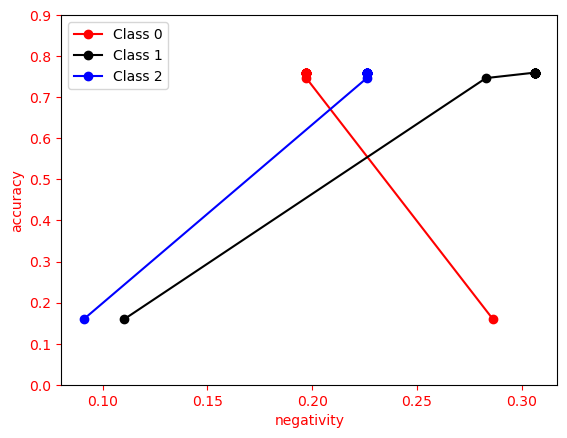

In [11]:
print_negativities(negativities_per_class, scores_list)

Entropies ao longo do treinamento
Classe 0 [2.743157664252341e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15, 3.0860921092992853e-15]
Classe 1 [3.3314459330272633e-15, 2.6378049271599085e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.5539519953839635e-15, 2.553951995

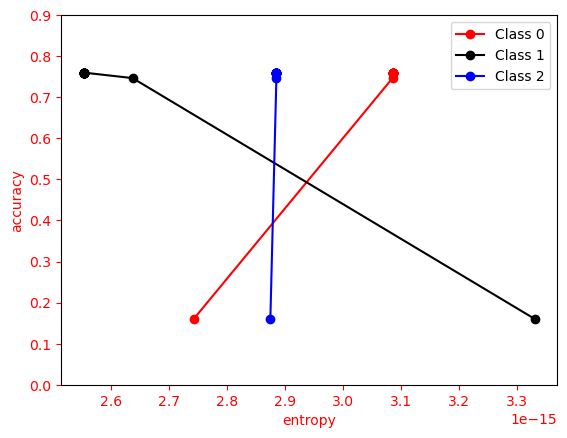

In [12]:
print_entropies(entropies_per_class, scores_list)